In [18]:
from pandas import read_csv
import pandas as pd
from sklearn.manifold import TSNE
import umap, umap.plot
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# whenever we have medical dataset this below library is the best to visualize the dataset
from bioinfokit.visuz import cluster

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load dataset
filename = "TSNE_data.csv"
data = read_csv(filename)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Split-out Validation Dataset
array = data.values
# Seperate array into input and output components
x = array[:,1:]
y = array[:,0]

In [7]:
# TSNE Visualization
data_tsne = TSNE(n_components=2).fit_transform(x)
cluster.tsneplot(data_tsne)

In [13]:
data_tsne

array([[ 17.509893 , -25.496176 ],
       [ 16.952509 , -28.155096 ],
       [ 12.368968 , -26.787838 ],
       ...,
       [ -4.2916327, -18.797005 ],
       [ 14.877558 , -27.462706 ],
       [ 30.384438 ,   8.507154 ]], dtype=float32)

In [12]:
# get a list of categories
# color_class = data['diagnosis'].to_numpy()
cluster.tsneplot(score = data_tsne, colorlist = y, legendpos = 'upper right')

# Plot will be stored in the default directory

In [14]:
d = cluster.tsneplot(score = data_tsne, colorlist = y, legendpos = 'upper right')

# t-SNE

<b>t-SNE</b> (pronounced tiz-knee), which stands for <b>t-distributed Stochastic Neighbor Embedding</b> was proposed much more recently by Laurens van der Maaten and Geoffrey Hinton in their 2008 paper. This works in a similar way to PCA but has some key differences:

+ Firstly, this is a <b>stochastic method</b>. So if you run multiple t-SNE plots on the same dataset it can look different.
+ Another difference is that this is an <b>iterative method</b>. It works by repeatedly moving datapoints closer or further away from each other depending on how 'similar' they are.
+ The new representation is <b>non-linear</b>. This makes it harder to interpret but it can be very effective at 'unravelling' highly non-linear data.


The main downside to t-SNE is that is <b>very slow</b> compared to the other dimensionality techniques. This is because it makes calculations on a pair-wise basis, which does not scale well with large datasets.

In [16]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(x)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(569, 2)


,tsne comp. 1,tsne comp. 2
0,-2.810081,29.081661
1,-0.770650,31.054003
2,2.133400,27.174513
3,-13.235687,-17.039719
4,4.644906,27.394653


##### t-SNE plot in 2D coloured by class

Text(0, 0.5, 'tsne component 2')

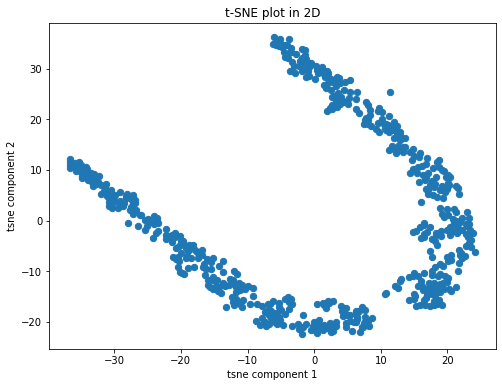

In [21]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

Like PCA, t-SNE is an <b>unsupervised algorithm</b>, however we will use the same k-Means clusters from before to colour code the data points.

##  UMAP
UMAP, which stands for <b>Uniform Manifold Approximation</b> and Projection was proposed by Leland McInnes, John Healy and James Melville in their 2018 paper.

It is similar to t-SNE in that it learns a non-linear mapping that preserves clusters but its main advantage is that it is <b>significantly faster</b>. It also tends to do better at preserving global structure of the data compared to t-SNE.

In [23]:
# UMAP
um = umap.UMAP()
X_fit = um.fit(x)           # we'll use X_fit later
X_umap = um.transform(x)

# Convert to data frame
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

# Shape and preview
print(umap_df.shape)
umap_df.head()

(569, 2)


,umap comp. 1,umap comp. 2
0,11.060585,-0.200324
1,11.154128,-0.268228
2,10.555651,1.170781
3,0.133083,5.148781
4,10.357246,1.483555


Text(0, 0.5, 'umap component 2')

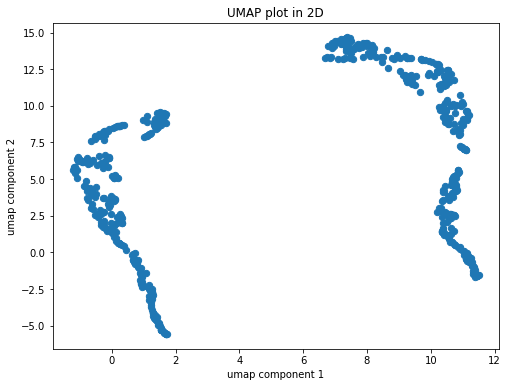

In [26]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], cmap="brg", s=40)

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')

### UMAP connectivity plot
UMAP can also be represented as a connected graph, which can be useful to get insights into the topolical embedding. Currently this function is only available in 2D.

<AxesSubplot:>

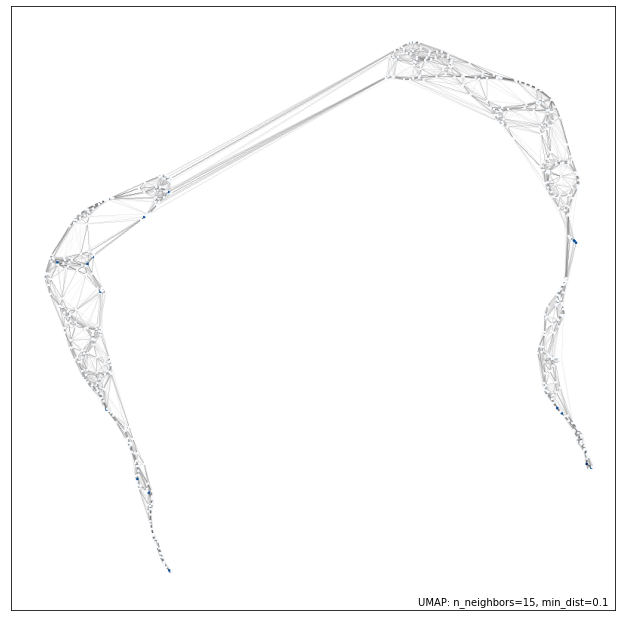

In [27]:
# Connectivity plot
umap.plot.connectivity(X_fit, show_points=True)